# Time Series Analysis


In [22]:
# Import Libraries

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
import statsmodels.tsa.stattools as ts
import statsmodels.tsa.api as tsa
import patsy
import warnings
warnings.filterwarnings("ignore")
from arch.unitroot import ADF 


import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 5 Time Series Analysis\04 Live Data Sets")

Case Study:

Background:

Annual Sales for a specific company from year 1961 to 2017


Objective: 

To plot a time series object


In [14]:
# Read in the data
salesdata = pd.read_csv("turnover_annual.csv")
print("✅ Dataset Loaded Successfully")
print(salesdata.head())

✅ Dataset Loaded Successfully
   Year   sales
0  1961  224786
1  1962  230034
2  1963  236562
3  1964  250960
4  1965  261615


In [3]:
print(salesdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    57 non-null     int64
 1   sales   57 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB
None


In [4]:
# Create a Time Series Object
rng = pd.date_range('01-01-1961','31-12-2017',freq='Y')
s = salesdata.sales.values
salesseries = pd.Series(s, rng)

date_range() creates pandas date object.  

When the time series has seasonal components, argument freq = can be included. It denotes number of observations per unit of time. Eg. If data is quarterly: freq = ‘Q’, if data is monthly: freq = ‘M’.  

pd.Series()  combines time series variable object “s” and date object “rng”.
      The new object salesseries will be used for further analysis.


<Axes: title={'center': 'Sales Time Series (Simple Plot)'}>

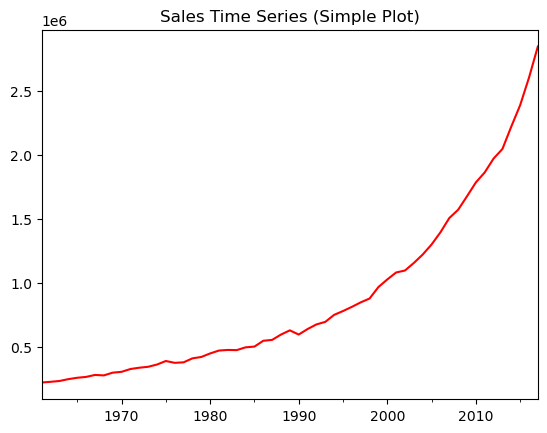

In [5]:
# Plot Time Series Object
salesseries.plot(color='red', title ="Sales Time Series (Simple Plot)")


In [6]:
# Subsetting Time Series in Python

salesseries2 = salesseries.loc['1990-12-31':'2016-12-31']


loc[ ] is a generic function which extracts the subset of the object x observed between the times specified within the range.


<Axes: title={'center': 'Sales Time Series (Subset)'}>

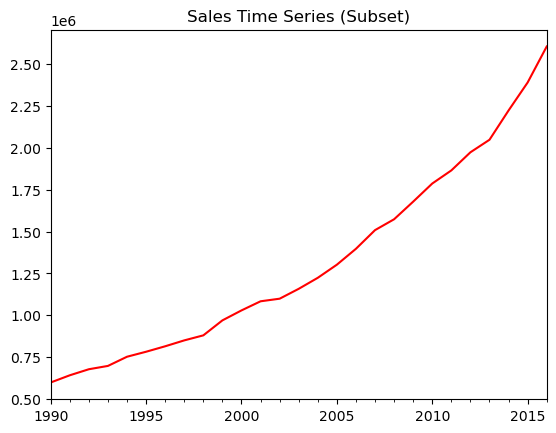

In [7]:
salesseries2.plot(color='red', title ="Sales Time Series (Subset)")


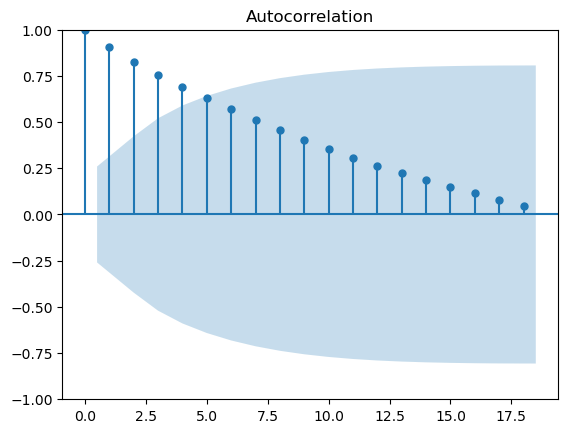

In [10]:
# Checking for Stationarity

plot_acf(salesseries);


<Axes: >

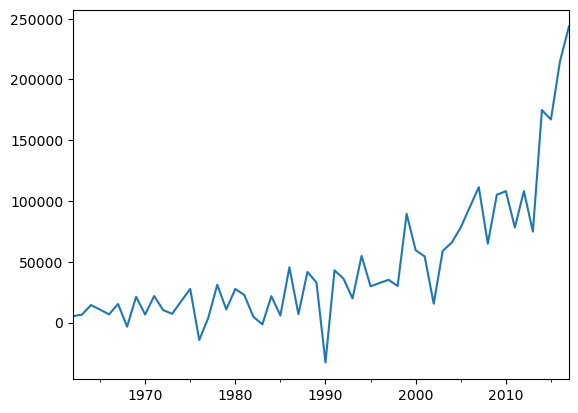

In [12]:
# First order differencing
salesdiff = diff(salesseries)
salesdiff.plot()


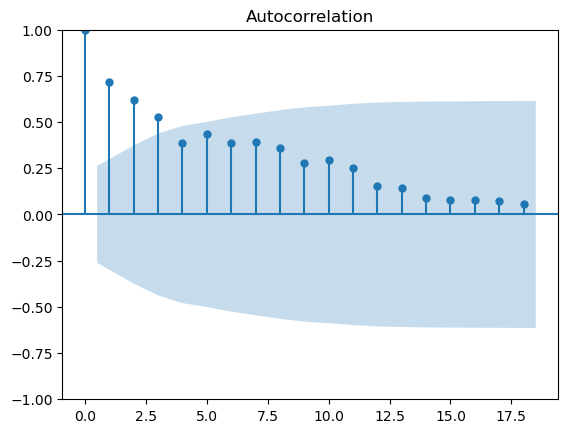

In [17]:
# ACF Plot Correlogram for 1st Order Differenced Time Series

plot_acf(salesdiff);


Interpretation :
 
ACF plot shows slow decay  

Stationarity is not achieved with first difference.


<Axes: >

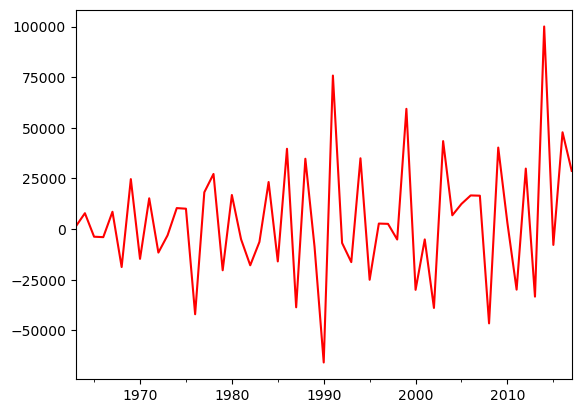

In [18]:
# Plot of  2nd Order Differenced Time Series
salesdiff2 = diff(salesdiff)
salesdiff2.plot(color='red')


Interpretation :
After 2nd order differencing, the series looks stationary.


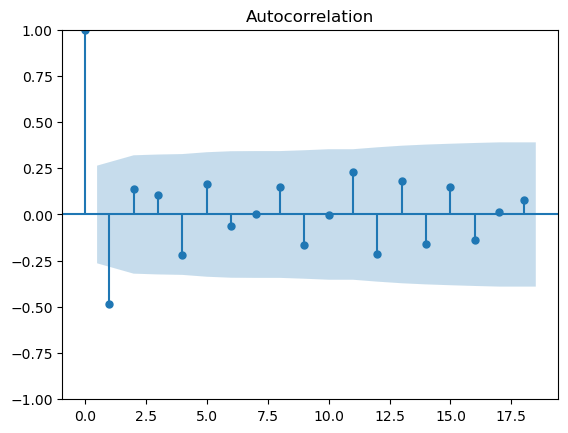

In [19]:
# Correlogram for 2nd  Order Differenced Time Series

plot_acf(salesdiff2);



Stationarity is achieved with 2nd order difference.


Dickey Fuller Test


In [21]:
%pip install arch

Note: you may need to restart the kernel to use updated packages.Collecting arch
   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 926.2/926.2 kB 5.3 MB/s eta 0:00:00



In [27]:
# Dickey Fuller Test for Stationarity

adf = ADF(salesseries,lags=0, trend='c')
adf.summary()


Test Statistic,15.780
P-value,1.000
Lags,0


In [29]:
# Checking stationarity for series with difference of order 2


adf = ADF(salesdiff2,lags=0,trend='n')
adf.summary()


Test Statistic,-11.908
P-value,0.000
Lags,0
